## Polinomial Multiple Linear Regression with python
This is a Polinomial Multiple Linear Regression analysis using Concrete Slump Data.

The UCI Machine Learning Repository has this dataset containing diferent variables (Cement, Slag, Fly ash, Water, SP, Coarse Aggr., Fine Aggr., SLUMP, FLOW, 28-day Compressive Strength). 

The dataset is maintained on their site, where it can be found by the title "Concrete Slump Test Data Set".

<b>Citation:</b>
Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#importing data
dataset = pd.read_excel('Concrete_Data.xls')
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
#We are going to use the Cement and Concrete compressive Strength for this
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#X = X.reshape(-1, 1)
y = y.reshape(-1,1)

In [7]:
print(X)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


In [8]:
print(y)

[[79.98611076]
 [61.88736576]
 [40.26953526]
 ...
 [23.69660064]
 [32.76803638]
 [32.40123514]]


In [9]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
#print(X_train,y_train)

In [11]:
#print(X_test,y_test)

In [10]:
#Training the simple Linear Regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#regressor.fit(X_train, y_train)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =3) #polynomial grade 3
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
regressor.fit(X_poly, y_train)

LinearRegression()

In [55]:
#Predicting the test set results
y_pred = regressor.predict(X_poly_test)
print(y_pred)
np.set_printoptions(precision=2)  #two decimals
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))  #reshape vertically, and join prediction and real

35]
 [38.28 30.65]
 [19.4  13.18]
 [15.4   7.32]
 [48.66 43.38]
 [22.46 15.09]
 [31.8  32.84]
 [51.31 67.87]
 [51.66 57.22]
 [31.23 31.65]
 [27.96 20.73]
 [12.47 13.71]
 [29.58 32.63]
 [31.26 41.67]
 [27.03 25.18]
 [77.23 69.66]
 [77.72 79.3 ]
 [17.01 17.58]
 [50.79 44.42]
 [75.32 74.36]
 [21.7  16.5 ]
 [36.07 34.49]
 [16.06 12.18]
 [56.27 56.81]
 [75.3  64.9 ]
 [51.62 55.64]
 [25.9  25.75]
 [ 9.59  9.99]
 [40.03 35.17]
 [44.9  22.9 ]
 [22.56 24.05]
 [31.68 33.73]
 [37.73 33.08]
 [19.98 19.69]
 [25.35 21.02]
 [18.29 24.45]
 [35.79 37.42]
 [31.91 32.07]
 [26.21 32.72]
 [38.56 41.68]
 [41.14 35.3 ]
 [31.34 25.2 ]
 [56.33 37.68]
 [40.88 49.2 ]
 [36.72 31.72]
 [10.74 13.2 ]
 [10.79 11.65]
 [41.   46.25]
 [89.12 76.8 ]
 [53.26 51.96]
 [38.8  23.89]
 [49.92 48.7 ]
 [27.28 17.84]
 [69.87 74.5 ]
 [41.89 34.4 ]
 [47.63 46.93]
 [50.79 51.02]
 [62.05 74.99]
 [35.56 36.45]
 [44.1  44.21]
 [27.52 24.48]
 [29.13 32.88]
 [-4.61  8.54]
 [44.13 39.46]
 [18.21 21.91]
 [-4.66  8.54]
 [51.92 53.39]
 [39.1

In [59]:
median_error = sum(abs(y_pred - y_test))/len(y_pred)
max_error = max(abs(y_pred - y_test))
print(f"Median error = {median_error}, Max error = {max_error}")

Median error = [4.77], Max error = [22.]


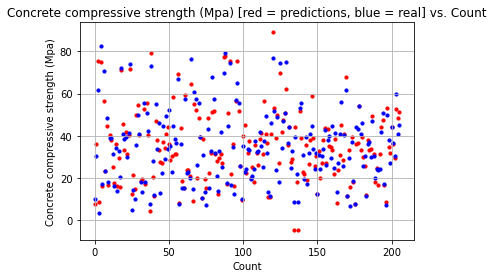

In [57]:
#Visualising the Trainin set results
plt.scatter(range(0,len(y_pred)),y_pred, color = 'red', s=10)  #predictions result
plt.scatter(range(0,len(y_pred)),y_test, color = 'blue', s=10)  #real result

plt.title('Concrete compressive strength (Mpa) [red = predictions, blue = real] vs. Count')
plt.xlabel('Count')
plt.ylabel('Concrete compressive strength (Mpa)')
plt.grid(True)
plt.show()